In [1]:
import random

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import multivariate_normal, nbinom

%matplotlib inline

In [2]:
def sample(distribution,
           min_val=0,
           max_val=1,
           mu=np.array([5, 5]),
           sigma=np.array([[1, .9], [.8, 2]]),
           sample_size=20,
           population_size=100,
           input_dist_fn=(lambda x,l: (1/l)*np.exp(-(1/l)*x))):
    mu = np.array(mu)
    sigma = np.array(sigma)
    if distribution == 'uniform':
        samp = sample_uniform(min_val, max_val, sample_size, plot=True)

    elif distribution == 'gaussian':
        samp = sample_gaussian(mu, sigma, sample_size)

    elif distribution == 'non-uniform':

        samp = sample_non_uniform(
            dist_fn = input_dist_fn,
            sample_size=sample_size,
            population_size=population_size,
            plot=True)

    return samp

In [3]:
def sample_uniform(min_val = 0, max_val = 1, size = 1, plot = False):
    x=[]
    for i in range(size):
        temp = random.random()
        temp *= (max_val - min_val)
        temp = temp + min_val
        x.append(temp)
    if plot:
        plt.hist(x, density=True, bins = 20)
        plt.title("histogram for uniform distribution of size: " + str(size))
    return x

In [4]:
def sample_gaussian(mu, sigma, sample_size):
    samples = []
    P = lambda x: multivariate_normal.pdf(x, mean=mu, cov=sigma)
    accepted = 0
    while accepted < sample_size:
        x = []
        for i in range(len(mu)):
            temp = sample_uniform(
                min_val=(mu[i] - 3 * sigma[i][i]),
                max_val=(mu[i] + 3 * sigma[i][i]),
                size=1)
            x.extend(temp)
    
        y = random.random()
        if y <= P(x):
            samples.append(x)
            accepted += 1
    samples = np.array(samples)
    if len(mu) == 1:
        n, bins, patches = plt.hist(samples.ravel(),density=True, bins=20, histtype='bar')
        y = multivariate_normal.pdf(bins, mu, sigma)
        plt.plot(bins, y)
        plt.title("histogram for normal distribution of size: " + str(sample_size))
    return samples

In [5]:
#1) group the data
#2) assign each group increasing probabilities of being selected
#3) sample with replacement from within the group
def sample_non_uniform(dist_fn,
                       sample_size,
                       population_size,
                       plot=True,
                       n_groups=6):
    P = dist_fn

    n_groups = 6
    dist = []
    accepted = 0
    # make distribution
    while accepted < population_size:
        x = sample_uniform(min_val=0, max_val=population_size, size=1)
        y = random.random()
        if y <= P(x[0], 100):  # pass scale parameter as scale
            dist.extend(x)
            accepted += 1
    dist = np.array(dist)
    n, bins, patches = plt.hist(
        dist.ravel(), density=True, bins=20, histtype='bar')
    plt.title(
        "histogram for given distribution of size: " + str(population_size))

    #     generate bins and group vals
    counts, bins = np.histogram(dist, n_groups)
    # divide data into diff groups,
    # make a mask array having a proportion of histogram and then uniform sample from it
    data = []
    mask = []
    j = 0
    for i in range(1, len(bins)):
        temp = dist[np.where(dist >= bins[j])]
        temp = temp[np.where(temp <= bins[i])]
        mask.extend(np.full((counts[j]), j))
        data.append(temp)
        j = i
    samples = []
    for i in range(sample_size):
        index = int(sample_uniform(max_val=1000, size=1)[0])
        index = mask[index]
        y = int(sample_uniform(max_val=data[index].shape[0], size=1)[0])
        sample = data[index][y]
        data[index] = np.delete(data[index], y)
        samples.append(sample)

    return samples

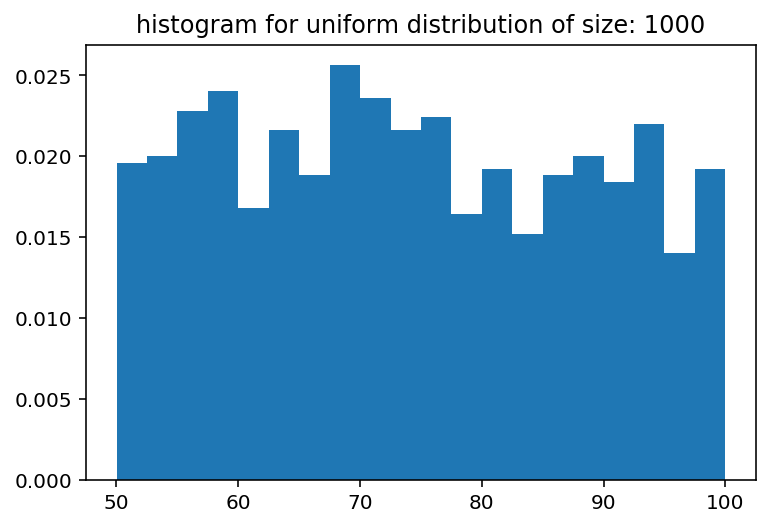

In [6]:
x = sample('uniform',sample_size=1000, max_val=100, min_val=50)

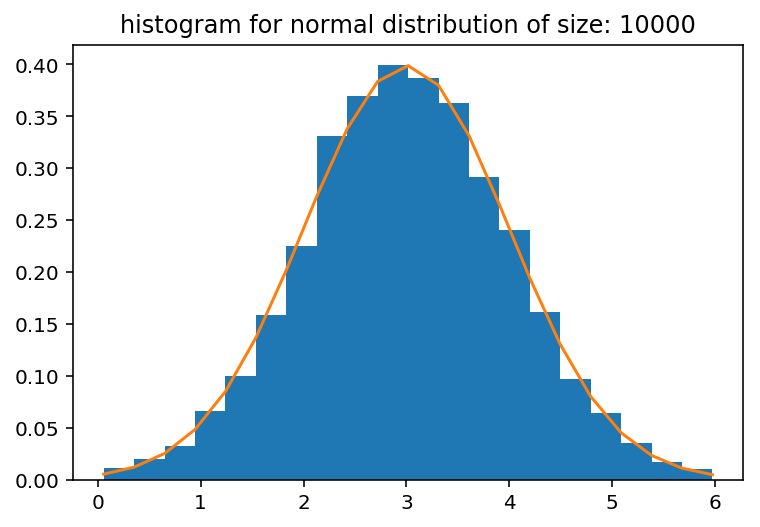

In [7]:
#1d normal distribution
x = sample('gaussian', mu = [3], sigma=[[1]], sample_size=10000)

Min and Max values


array([-2.72647566, -2.78685897])

array([2.86921103, 2.80014852])

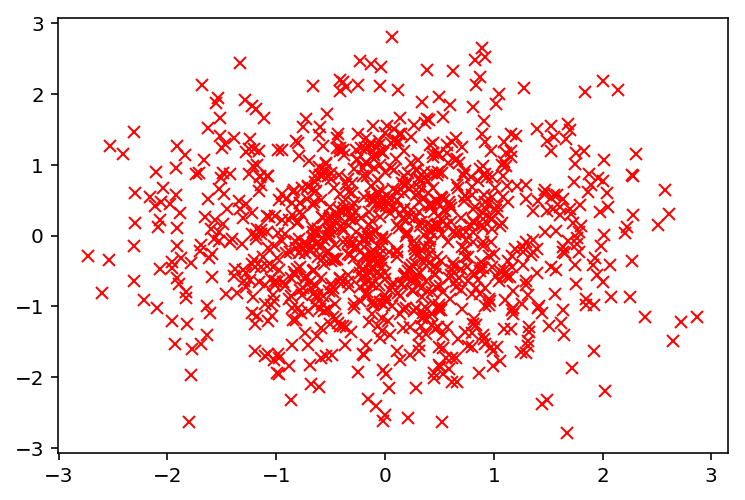

In [8]:
x = sample('gaussian', mu = [0,0], sigma=[[1,0],[0,1]], sample_size=1000)
plt.plot(x.T[0],x.T[1],'rx')
print("Min and Max values")
np.amin(x, axis=0)
np.amax(x, axis=0)

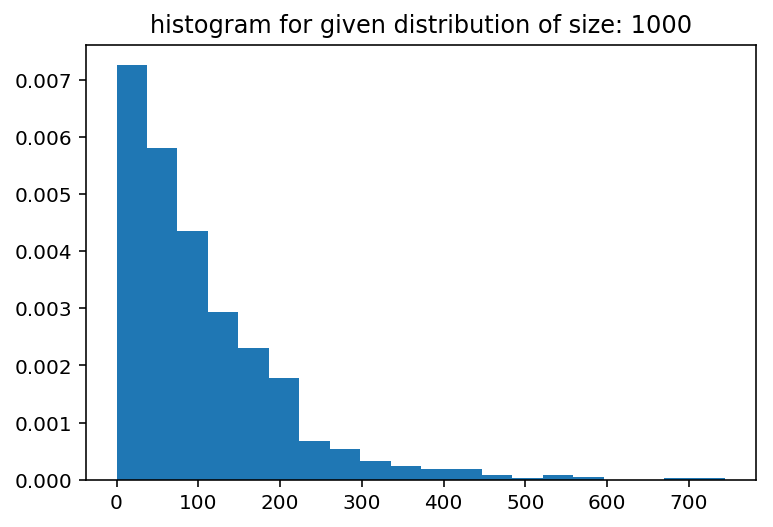

In [9]:
x = sample(distribution='non-uniform', sample_size=20, population_size=1000)

(array([5., 5., 3., 2., 0., 1., 1., 0., 0., 3.]),
 array([  5.3030571 ,  40.18634664,  75.06963618, 109.95292572,
        144.83621526, 179.7195048 , 214.60279434, 249.48608388,
        284.36937342, 319.25266296, 354.1359525 ]),
 <a list of 10 Patch objects>)

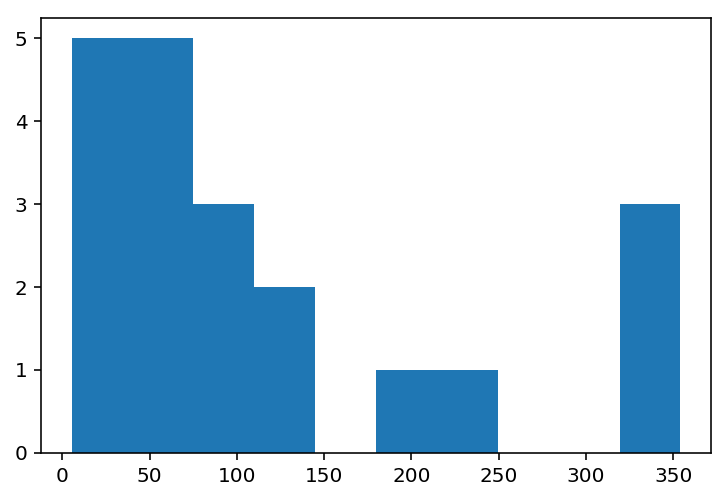

In [10]:
plt.hist(x)